In [3]:
%matplotlib inline

# FIX LABELS OF THYROID COMPOUNDED VOLUME 13

In [2]:
SEGMENTATION_SLICES="C:/Users/Tmenova/personal/tum/thesis/initial-data/new_datasets/THYROID_COMPOUNDED/val/labels/13"

In [ ]:
def remap_lables(old_label_image, old_labels, new_labels):
    old_labels_unique = np.unique(old_label_image)
    print('old_current', old_labels_unique)
    print('old_assumed', old_labels)
    # for old_current, old_assumed in zip(old_labels_unique,np.array(old_labels) ):
    #     assert(old_current==old_assumed)
    new_label_image = np.zeros_like(old_label_image)
    for old_label_i, target_label_i in zip(old_labels, new_labels):
        new_label_image[old_label_image == int(old_label_i)] = int(target_label_i)
    return new_label_image

In [ ]:
# for patient 13 this is the correspondence
old_labels = [0, 10923, 21845, 32768, 43690, 54613, 65535]
new_labels = [1, 2, 3, 4, 5, 6, 7]

In [ ]:
# rename segm file names to match volume file names
for segm_slice_file in sorted(os.listdir(SEGMENTATION_SLICES)):
    segm_slice_file_path = os.path.join(SEGMENTATION_SLICES, segm_slice_file)
    segm = np.array(Image.open(segm_slice_file_path))
    new_segm = remap_lables(segm, old_labels, new_labels)
    new_segm_image = Image.fromarray(new_segm)
    new_segm_image.save(str(segm_slice_file_path))
    

In [ ]:
SEGMENTATION_SLICES="C:/Users/Tmenova/personal/tum/thesis/initial-data/new_datasets/THYROID_COMPOUNDED/val/labels/13"
VOLUME_SLICES="C:/Users/Tmenova/personal/tum/thesis/initial-data/new_datasets/THYROID_COMPOUNDED/val/images/13"


In [ ]:
# rename(SEGMENTATION_SLICES, VOLUME_SLICES)

## Remap background to 0 in THYROID_COMPOUNDED TEST AND VAL datasets

In [2]:
import numpy as np
import os
from PIL import Image

def remap_lables(old_label_image, old_labels, new_labels):
    old_labels_unique = np.unique(old_label_image)
    new_label_image = old_label_image
    for old_label_i, target_label_i in zip(old_labels, new_labels):
        # assert(target_label_i not in old_labels_unique)
        new_label_image[old_label_image == int(old_label_i)] = int(target_label_i)
    return new_label_image

In [10]:
SEGMENTATION_SLICES="C:/Users/Tmenova/personal/tum/thesis/initial-data/new_datasets/THYROID_COMPOUNDED/test/labels_fixed"

old_labels = [7]
new_labels = [0]

for segm_slice_file in sorted(os.listdir(SEGMENTATION_SLICES)):
    segm_slice_file_path = os.path.join(SEGMENTATION_SLICES, segm_slice_file)
    segm = np.array(Image.open(segm_slice_file_path))
    new_segm = remap_lables(segm, old_labels, new_labels)
    new_segm_image = Image.fromarray(new_segm)
    new_segm_image.save(str(segm_slice_file_path))


In [11]:
SEGMENTATION_SLICES="C:/Users/Tmenova/personal/tum/thesis/initial-data/new_datasets/THYROID_COMPOUNDED/val/labels_fixed"

old_labels = [7]
new_labels = [0]

for segm_slice_file in sorted(os.listdir(SEGMENTATION_SLICES)):
    segm_slice_file_path = os.path.join(SEGMENTATION_SLICES, segm_slice_file)
    segm = np.array(Image.open(segm_slice_file_path))
    new_segm = remap_lables(segm, old_labels, new_labels)
    new_segm_image = Image.fromarray(new_segm)
    new_segm_image.save(str(segm_slice_file_path))


## Check background to 0 in THYROID_COMPOUNDED TEST AND VAL, VAL MINI, US_MIXED VAL AND TEST datasets

In [4]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [7]:
SEGMENTATION_SLICES="/home/guests/oleksandra_tmenova/test/project/thesis-codebase/data/THYROID_COMPOUNDED/val_mini/labels"

old_labels = [7]
new_labels = [0]

for segm_slice_file in sorted(os.listdir(SEGMENTATION_SLICES)):
    segm_slice_file_path = os.path.join(SEGMENTATION_SLICES, segm_slice_file)
    segm = np.array(Image.open(segm_slice_file_path))
    new_segm = remap_lables(segm, old_labels, new_labels)
    new_segm_image = Image.fromarray(new_segm)
    new_segm_image.save(str(segm_slice_file_path))


# Check labels of thyrid in US_MIXED dataset

In [35]:
SEGMENTATION_SLICES="/home/guests/oleksandra_tmenova/test/project/thesis-codebase/data/US_MIXED/val/labels"

all_labels = sorted(os.listdir(SEGMENTATION_SLICES))
thyroid_labels = [l for l in all_labels if "US_comp" in os.path.join(SEGMENTATION_SLICES, l)]
len(thyroid_labels)

229

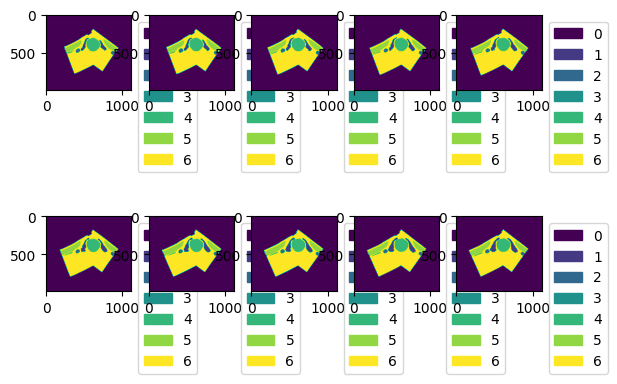

In [36]:
old_labels = [7]
new_labels = [0]

Tot = len(thyroid_labels[:10])
Cols = 5
Rows = Tot // Cols 
if Tot % Cols != 0:
    Rows += 1
Position = range(1,Tot + 1)

fig = plt.figure(1)
for k in range(Tot):
    ax = fig.add_subplot(Rows,Cols,Position[k])

    segm_slice_file_path = os.path.join(SEGMENTATION_SLICES, thyroid_labels[k])
    segm = np.array(Image.open(segm_slice_file_path))
    im = ax.imshow(segm)
    values = np.unique(segm.ravel())
    colors = [ im.cmap(im.norm(value)) for value in values]
    patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=values[i]) ) for i in range(len(values)) ]
    ax.legend(handles=patches, bbox_to_anchor=(1., 1), loc=2)

plt.show()

In [27]:
old_labels = [7]
new_labels = [0]

for segm_slice_file in sorted(thyroid_labels):
    segm_slice_file_path = os.path.join(SEGMENTATION_SLICES, segm_slice_file)
    segm = np.array(Image.open(segm_slice_file_path))
    new_segm = remap_lables(segm, old_labels, new_labels)
    new_segm_image = Image.fromarray(new_segm)
    new_segm_image.save(str(segm_slice_file_path))
